<h1>Содержание / Content<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных / data-preparation" data-toc-modified-id="Подготовка-данных-1 / data-preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных / Data preparation</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи / Study the problem</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом / Fighting Imbalance</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели / Model testing</a></span></li></ul></div>

# Отток клиентов  /Customer churn

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. 
Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Требуется построить модель со значением *F1*-меры не меньше 0.59.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)


It is necessary to predict whether the client will leave the bank in the near future or not.
Historical data on customer behavior and termination of contracts with the bank is provided.

It is required to build a model with a *F1*-measure value of at least 0.59.

Data source: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных  / Data preparation

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from joblib import dump
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('/Users/vladamalkina/Desktop/ЯП проекты/проект 7/churn_seventh_project.csv')
display(data)

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10000 non-null  int64  
 1   RowNumber        10000 non-null  int64  
 2   CustomerId       10000 non-null  int64  
 3   Surname          10000 non-null  object 
 4   CreditScore      10000 non-null  int64  
 5   Geography        10000 non-null  object 
 6   Gender           10000 non-null  object 
 7   Age              10000 non-null  int64  
 8   Tenure           9091 non-null   float64
 9   Balance          10000 non-null  float64
 10  NumOfProducts    10000 non-null  int64  
 11  HasCrCard        10000 non-null  int64  
 12  IsActiveMember   10000 non-null  int64  
 13  EstimatedSalary  10000 non-null  float64
 14  Exited           10000 non-null  int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data = data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])

In [5]:
print(data.dtypes)

Unnamed: 0           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [6]:
data = data.dropna()

In [7]:
data_train, data_common = train_test_split(data,  test_size = 0.4, random_state = 12345)
data_valid, data_test = train_test_split(data_common,  test_size = 0.5, random_state = 12345)

Разбили данные на три выборки: обучающую, валидационную и тестовую, соотношение 3:1:1 (60% : 20% : 20%)

We divided the data into three samples: training, validation and test, ratio 3:1:1 (60% : 20% : 20%)

In [8]:
features_train = data_train.drop(['Exited'], axis=1)
target_train = data_train['Exited']
features_valid = data_valid.drop(['Exited'], axis=1)
target_valid = data_valid['Exited'] 
features_test = data_test.drop(['Exited'], axis=1)
target_test = data_test['Exited']

features - признаки
target - целевой признак

С помощью техники ohe преобразуем категориальные признаки в численные:

Using the ohe technique, we convert categorical features into numerical ones:

In [9]:
features_train = pd.get_dummies(features_train, drop_first=True)
features_valid = pd.get_dummies(features_valid, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)

Поскольку в данных присутствуют количественные признаки с разными разбросами значений, нужно привести признаки к одному масштабу:

Since the data contains quantitative characteristics with different ranges of values, it is necessary to bring the characteristics to the same scale:

In [10]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Проверяем размеры выборок / Checking sample sizes:

In [11]:
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(5454, 12)
(5454,)
(1818, 12)
(1818,)
(1819, 12)
(1819,)


## Исследование задачи / Problem research

Дерево решений без учета дисбаланса классов / Decision tree without taking into account class imbalance:

In [12]:
best_result = 0
best_model_decision_tree = None
for depth in range(1, 6):
    model_decision_tree = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    model_decision_tree.fit(features_train, target_train)
    predictions_valid =  model_decision_tree.predict(features_valid)
    result = accuracy_score(target_valid, predictions_valid)
    if result > best_result:
        best_model_decision_tree = model_decision_tree
        best_result = result 

print("Accuracy наилучшей модели на валидационной выборке:", best_result)

Accuracy наилучшей модели на валидационной выборке: 0.856985698569857


Создали константную модель / Created a constant model:

In [13]:
target_pred_constant = pd.Series([0]*len(target_valid))
print(accuracy_score(target_valid, target_pred_constant))

0.7926292629262927


Accuracy решающего дерева и константной модели почти одинаковы.
В задаче наблюдается дисбаланс классов. Для оценки качества модели accuracy не подходит.

The accuracy of the decision tree and the constant model are almost the same.
There is a class imbalance in the problem. Accuracy is not suitable for assessing the quality of a model.

In [14]:
best_result = 0
best_model_decision_tree = None
for depth in range(1, 6):
    model_decision_tree = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    model_decision_tree.fit(features_train, target_train)
    predicted_valid =  model_decision_tree.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model_decision_tree = model_decision_tree
        best_result = result 
print("F1 мера наилучшей модели на валидационной выборке:", best_result)

F1 мера наилучшей модели на валидационной выборке: 0.5414551607445008


Случайный лес без учета дисбаланса классов / Random forest without class imbalance:

In [15]:
best_model_forest = None
best_result = 0
for est in range(1, 11):
    for depth in range (1, 11):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(features_train, target_train) 
        predicted_valid =  model_forest.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model_forest = model_forest
            best_result = result
print("F1 мера наилучшей модели на валидационной выборке:", best_result)

F1 мера наилучшей модели на валидационной выборке: 0.5743589743589743


Логистическая регрессия без учета дисбаланса классов / Logistic regression without class imbalance:

In [16]:
model_regression = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
model_regression.fit(features_train, target_train)
predicted_valid =  model_regression.predict(features_valid) 
dump(model_regression, 'model_9_1.joblib')
print("F1 мера наилучшей модели на валидационной выборке:", f1_score(target_valid, predicted_valid))

F1 мера наилучшей модели на валидационной выборке: 0.3116370808678501


F1-measure

Decision tree without class imbalance: 0.5414551607445008

Random forest without class imbalance: 0.569364161849711

Logistic regression without class imbalance: 0.303393213572854

Дисбаланс классов плохо сказывается на обучении модели / Class imbalance is bad for model training.

## Борьба с дисбалансом / Fighting Imbalance

0    0.793546
1    0.206454
Name: Exited, dtype: float64


<AxesSubplot:>

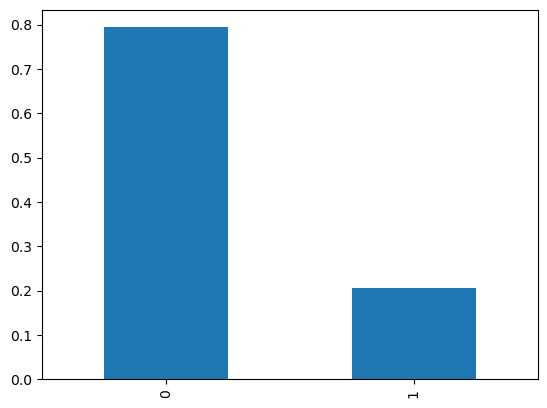

In [17]:
class_frequency = data_train['Exited'].value_counts(normalize = True)
print(class_frequency)
class_frequency.plot(kind='bar')

Для борьбы с дисбалансом классов используем class_weight, техники upsampling и downsampling.

To combat class imbalance, we use class_weight, upsampling and downsampling techniques.

# upsample

In [18]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

Дерево решений / Decision tree:

In [19]:
best_result = 0
best_model_decision_tree_upsample = None
for depth in range(1, 6):
    model_decision_tree = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    model_decision_tree.fit(features_upsampled, target_upsampled)
    predicted_valid =  model_decision_tree.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model_decision_tree_upsample = model_decision_tree
        best_result = result 
print("F1 мера наилучшей модели на валидационной выборке:", best_result)

F1 мера наилучшей модели на валидационной выборке: 0.5929526123936817


In [20]:
probabilities_valid = best_model_decision_tree_upsample.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("AUC-ROC наилучшей модели на валидационной выборке:", roc_auc_score(target_valid, probabilities_one_valid))

AUC-ROC наилучшей модели на валидационной выборке: 0.8400158672598789


Случайный лес / Random forest

In [21]:
best_model_forest_upsample = None
best_result = 0
for est in range(1, 11):
    for depth in range (1, 11):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(features_upsampled, target_upsampled) 
        predicted_valid =  model_forest.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model_forest_upsample = model_forest
            best_result = result
print("F1 мера наилучшей модели на валидационной выборке:", best_result)

F1 мера наилучшей модели на валидационной выборке: 0.6339522546419099


In [22]:
probabilities_valid = best_model_forest_upsample.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("AUC-ROC наилучшей модели на валидационной выборке:", roc_auc_score(target_valid, probabilities_one_valid))

AUC-ROC наилучшей модели на валидационной выборке: 0.8535527383908537


Логистическая регрессия / Logistic Regression:

In [23]:
model_regression_upsample = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000) 
model_regression_upsample.fit(features_upsampled, target_upsampled)
predicted_valid = model_regression_upsample.predict(features_valid) 
print("F1 мера наилучшей модели на валидационной выборке:", f1_score(target_valid, predicted_valid))

F1 мера наилучшей модели на валидационной выборке: 0.5055187637969095


In [24]:
probabilities_valid = model_regression_upsample.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("AUC-ROC наилучшей модели на валидационной выборке:", roc_auc_score(target_valid, probabilities_one_valid))

AUC-ROC наилучшей модели на валидационной выборке: 0.77713310643029


F1-measure

Decision tree upsampling: 0.5902439024390244

Random forest upsampling: 0.5371775417298937

Logistic regression upsampling: 0.47016706443914086

AUC-ROC

Decision tree upsampling: 0.8354075511222129

Random forest upsampling: 0.7977771110174374

Logistic regression upsampling: 0.7371152143460645

# downsample

In [25]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.66)

Дерево решений / Decision tree:

In [26]:
best_result = 0
best_model_decision_tree_downsample = None
for depth in range(1, 6):
    model_decision_tree = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    model_decision_tree.fit(features_downsampled, target_downsampled)
    predicted_valid =  model_decision_tree.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model_decision_tree_downsample = model_decision_tree
        best_result = result 
print("F1 мера наилучшей модели на валидационной выборке:", best_result)

F1 мера наилучшей модели на валидационной выборке: 0.5934640522875817


In [27]:
probabilities_valid = best_model_decision_tree_downsample.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("AUC-ROC наилучшей модели на валидационной выборке:", roc_auc_score(target_valid, probabilities_one_valid))

AUC-ROC наилучшей модели на валидационной выборке: 0.8427585838746671


Случайный лес / Random forest:

In [28]:
best_model_forest = None
best_result = 0
for est in range(1, 11):
    for depth in range (1, 11):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(features_downsampled, target_downsampled) 
        predicted_valid =  model_forest.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model_forest_downsample = model_forest
            best_result = result
print("F1 мера наилучшей модели на валидационной выборке:", best_result)

F1 мера наилучшей модели на валидационной выборке: 0.6263565891472869


In [29]:
probabilities_valid = best_model_forest_downsample.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("AUC-ROC наилучшей модели на валидационной выборке:", roc_auc_score(target_valid, probabilities_one_valid))

AUC-ROC наилучшей модели на валидационной выборке: 0.8573814971551218


Логистическая регрессия / Logistic Regression:

In [30]:
model_regression_downsample = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000) 
model_regression_downsample.fit(features_downsampled, target_downsampled)
predicted_valid = model_regression_downsample.predict(features_valid)
print("F1 мера наилучшей модели на валидационной выборке:", f1_score(target_valid, predicted_valid))

F1 мера наилучшей модели на валидационной выборке: 0.42258064516129035


In [31]:
probabilities_valid = model_regression_downsample.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("AUC-ROC наилучшей модели на валидационной выборке:", roc_auc_score(target_valid, probabilities_one_valid))

AUC-ROC наилучшей модели на валидационной выборке: 0.7737590127692786


F1-measure

Downsampling decision tree: 0.59375

Random forest downsampling: 0.21559633027522934

Logistic regression downsampling: 0.42022116903633494

AUC-ROC

Decision tree downsampling: 0.8427475393782318

Random forest downsampling: 0.7512079917976205

Logistic regression downsampling: 0.7535531065407347

# class_weight

Дерево решений / Decision tree:

In [32]:
best_result = 0
best_model_decision_tree_class_weight = None
for depth in range(1, 6):
    model_decision_tree = DecisionTreeClassifier(random_state=12345, max_depth = depth, class_weight = 'balanced')
    model_decision_tree.fit(features_train, target_train)
    predicted_valid =  model_decision_tree.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model_decision_tree_class_weight = model_decision_tree
        best_result = result 
print("F1 мера наилучшей модели на валидационной выборке:", best_result)

F1 мера наилучшей модели на валидационной выборке: 0.5735449735449736


In [33]:
probabilities_valid = best_model_decision_tree_class_weight.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("AUC-ROC наилучшей модели на валидационной выборке:", roc_auc_score(target_valid, probabilities_one_valid))

AUC-ROC наилучшей модели на валидационной выборке: 0.8396523192522141


Случайный лес / Random forest:

In [34]:
best_model_forest_class_weight = None
best_result = 0
for est in range(1, 11):
    for depth in range (1, 11):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight = 'balanced')
        model_forest.fit(features_train, target_train) 
        predicted_valid =  model_forest.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model_forest_class_weight = model_forest
            best_result = result
print("F1 мера наилучшей модели на валидационной выборке:", best_result)

F1 мера наилучшей модели на валидационной выборке: 0.6292397660818714


In [35]:
probabilities_valid = best_model_forest_class_weight.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("AUC-ROC наилучшей модели на валидационной выборке:", roc_auc_score(target_valid, probabilities_one_valid))

AUC-ROC наилучшей модели на валидационной выборке: 0.8565448765501411


Логистическая регрессия / Logistic Regression:

In [36]:
model_regression_balanced = LogisticRegression(random_state=12345, solver='liblinear', class_weight = 'balanced')
model_regression_balanced.fit(features_train, target_train)
predicted_valid = model_regression_balanced.predict(features_valid)
print("F1 мера наилучшей модели на валидационной выборке:", f1_score(target_valid, predicted_valid))

F1 мера наилучшей модели на валидационной выборке: 0.5102040816326531


In [37]:
probabilities_valid = model_regression_balanced.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("AUC-ROC наилучшей модели на валидационной выборке:", roc_auc_score(target_valid, probabilities_one_valid))

AUC-ROC наилучшей модели на валидационной выборке: 0.7779319916724496


F1-measure

Decision tree class_weight: 0.5711252653927813

Random forest class_weight: 0.5387840670859538

Logistic regression class_weight: 0.4818276220145379

AUC-ROC

Decision tree class_weight: 0.8356127946809706

Random forest class_weight: 0.7902024272121667

Logistic regression class_weight: 0.7462563758957547

Using the upsampling technique, we obtained the highest value of the f1 metric on the decision tree: 0.5929526123936817.

Using class_weight we got the highest value of the f1 metric in logistic regression: 0.5092592592592593

Using class_weight we got the highest value of the f1 metric on a random forest: 0.6497584541062802


Using the downsampling technique, we obtained the highest value of the AUC-ROC metric on the decision tree: 0.8425432161941769.

Using the downsampling technique, we obtained the highest value of the AUC-ROC metric on logistic regression: 0.7777681649753247.

Using the class_weight technique, we obtained the highest value of the AUC-ROC metric on a random forest: 0.8690573706367336.

## Тестирование модели / Model testing

In [38]:
predicted_test = best_model_forest_class_weight.predict(features_test)
print("Тестовая выборка:", f1_score(target_test, predicted_test))

Тестовая выборка: 0.5857321652065081
